In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [4]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [5]:
# Historical feedback

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Output':-1.7915148}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# All historical with average
df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.7523162693093]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.7206235657562]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.930424696872565]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.27531486418086]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.78061298874562]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.26776708209986]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.407671745180257]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.477771806345994]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.493640042508171]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.64382062728328]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.1885439118637]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.461078454524235]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.202982643990808]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.387800904560915]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.388257931049257]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.207220889212804]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0867939966802786]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.217891302437594]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.141654537678749]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.140564137222028]
df.loc[len(df)]=[3.95239e-01,4.04762e-01,6.25715e-01,7.55715e-01,1.00000e-06,-0.179871266605571]
df.loc[len(df)]=[3.81429e-01,4.07143e-01,6.32381e-01,7.57620e-01,1.00000e-06,-0.18164043271661]
df.loc[len(df)]=[3.74286e-01,4.12858e-01,6.32381e-01,7.68572e-01,1.00000e-06,-0.233770612579559]
df.loc[len(df)]=[0.428572,0.386667,0.600001,0.81,0.090476,-0.131829208322042]

#Print
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [6]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5     Output
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000
mean    0.499554   0.411097   0.529290   0.615052   0.285629  -1.102204
std     0.271260   0.267467   0.281803   0.296422   0.325345   0.820121
min     0.000500   0.000001   0.000001   0.000001   0.000001  -3.275315
25%     0.376191   0.235669   0.411879   0.434207   0.010326  -1.702558
50%     0.432166   0.391304   0.631579   0.736842   0.110624  -1.144785
75%     0.728186   0.536336   0.684210   0.774762   0.522528  -0.387801
max     0.999999   0.931871   0.999999   0.999999   0.999999  -0.086794


In [7]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_6/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_6/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.069772,0.905962,0.581371,0.793773,0.633475,-1.512695
1,0.589461,0.285973,0.382279,0.229949,0.294871,-1.349599
2,0.983661,0.062830,0.000923,0.659844,0.261878,-1.827396
3,0.498313,0.115366,0.160564,0.862793,0.869430,-1.716023
4,0.637905,0.077555,0.823803,0.456115,0.142820,-0.972484
5,0.446594,0.715371,0.179792,0.801559,0.379341,-1.205211
6,0.855981,0.266165,0.359416,0.853218,0.369172,-1.100991
7,0.420336,0.024429,0.216123,0.165697,0.647693,-1.913095
8,0.551354,0.894646,0.687066,0.474904,0.042253,-1.051574
9,0.530162,0.369501,0.246964,0.506557,0.510196,-1.194588


In [8]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
...,...,...,...,...,...,...
60,0.899463,0.465748,0.331575,0.746143,0.711950,-1.449138
61,0.691004,0.663477,0.766698,0.090888,0.475686,-1.811348
62,0.930265,0.332215,0.022972,0.509173,0.660459,-2.007718
63,0.442032,0.250873,0.646961,0.046415,0.254111,-0.999678


# Function 6: Cake and Stuff
### Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. You want this sum to be as close to zero as possible!

## Data exploration

In [11]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5     Output
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000
mean    0.531051   0.416877   0.504138   0.576204   0.338181  -1.228856
std     0.271822   0.274275   0.289154   0.298192   0.320484   0.731566
min     0.000500   0.000001   0.000001   0.000001   0.000001  -3.275315
25%     0.381429   0.235669   0.246964   0.356552   0.056401  -1.747617
50%     0.502496   0.386667   0.617500   0.684210   0.236272  -1.294247
75%     0.729523   0.663477   0.684210   0.774762   0.614962  -0.493640
max     0.999999   0.931871   0.999999   0.999999   0.999999  -0.086794

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Input_5    0
Output     0
dtype: int64


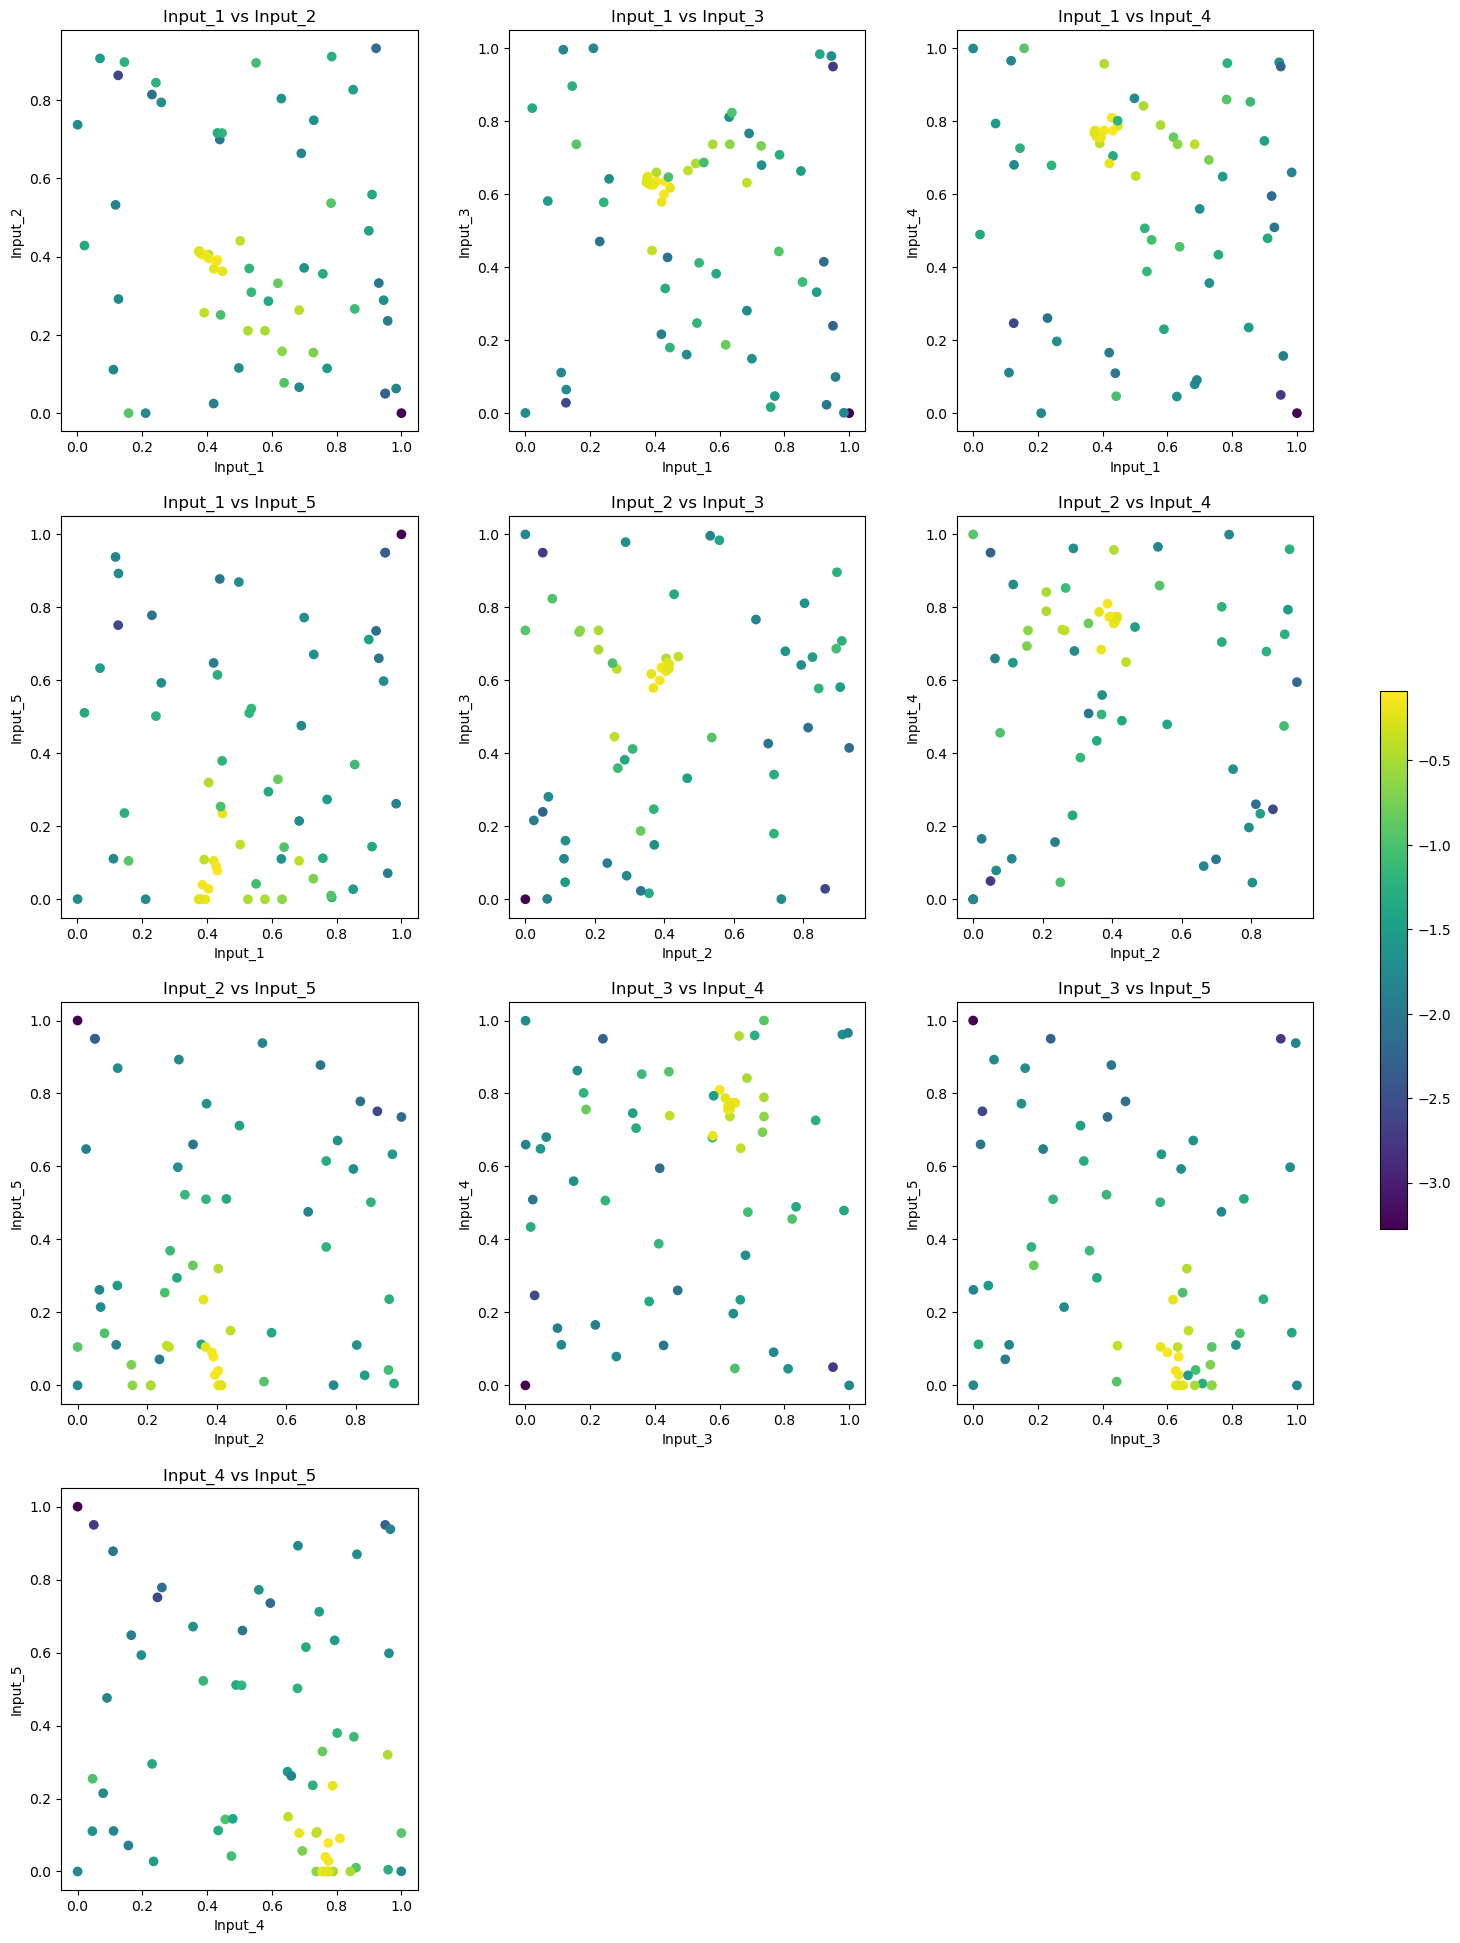

In [12]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

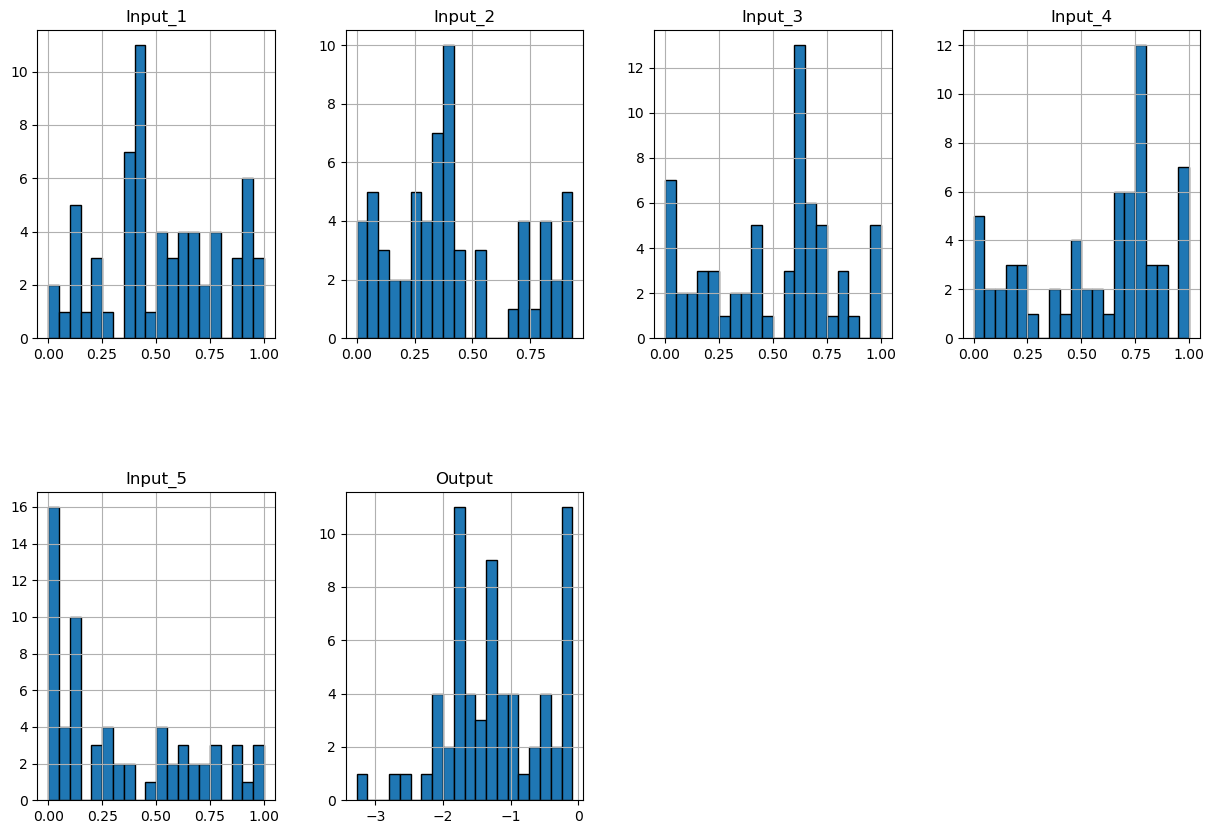

In [13]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

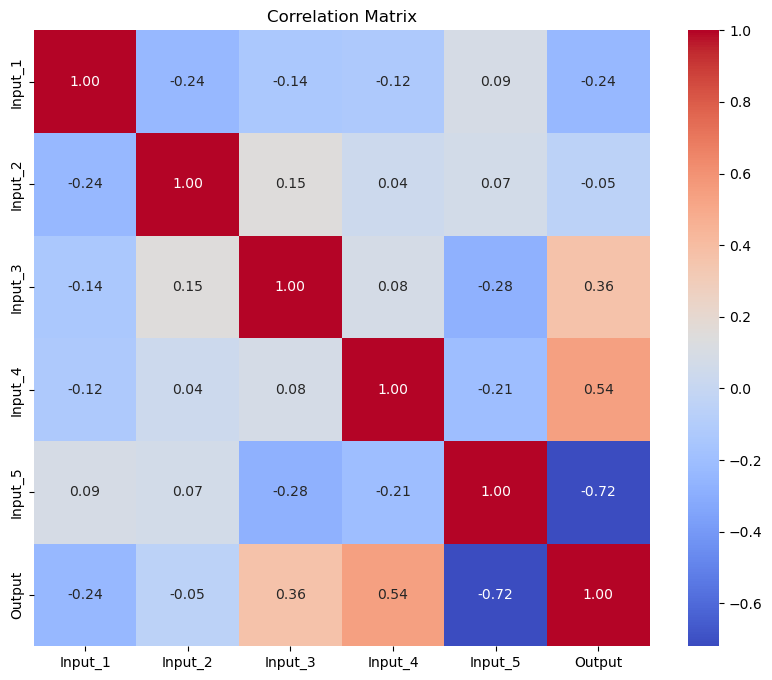

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

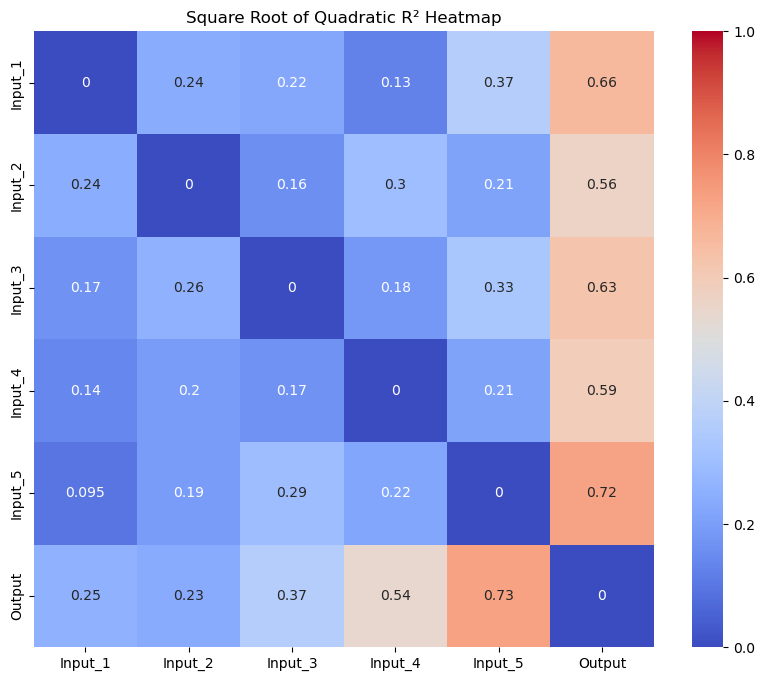

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


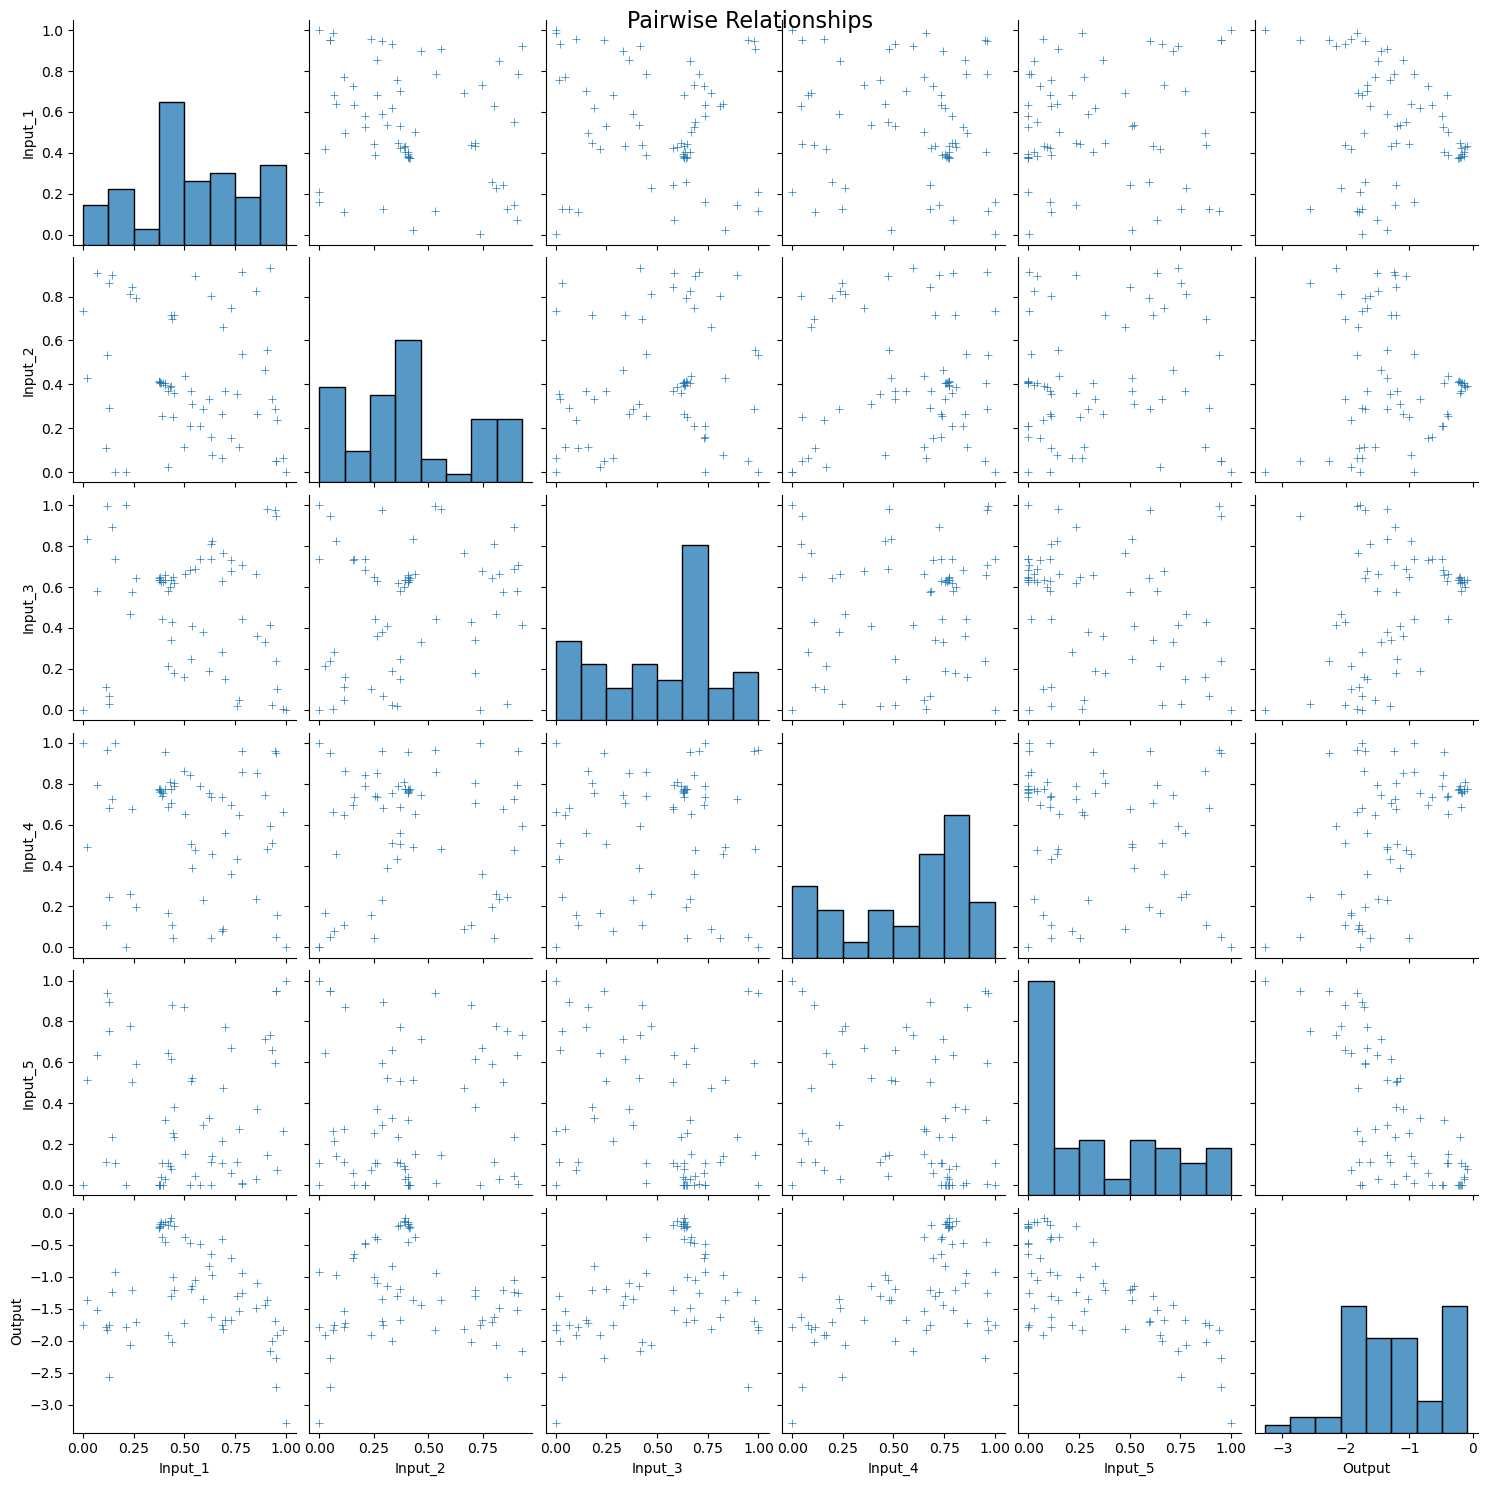

In [16]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## Tracking of potential queries, submissions and historical notes

#### 28 Apr. Ask 1.
[0.950000-0.050000-0.950000-0.050000-0.950000]

- En fase exploratoria con length scale de 0.2 y 0.3, noise entre e-4 y e-10. No cambio mucho

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.000500-0.736605-0.000500-0.999500-0.000500]
- [0.950000-0.050000-0.950000-0.050000-0.950000]

#### May 10
Los inputs 4 y 5 claramente son los mas correlacionados. Input 4 alto e input 5 bajo
- Lenght 1 [0.157895-0.000001-0.736842-0.999999-0.105264]
- LEnght .2 Beta 2.6 [0.999999-0.000001-0.000001-0.000001-0.999999]
- length .1 EI [0.210527-0.000001-0.999999-0.000001-0.000001]

#### MAy 14
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .3
- Beta 2.6 [0.999999-0.000001-0.000001-0.999999-0.999999] con lenght .2
- Beta 2.6 [0.210527-0.000001-0.999999-0.999999-0.999999] con lenght .15
- **** Vamos por exploratorio, pero voy a redondear [0.950000-0.050000-0.239474-0.950000-0.950000] (fue malo)

#### MAy 17
- [0.421053-0.315790-0.526316-0.736842-0.105264] len 1.0
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .3
- Beta 2.6 [0.000001-0.000001-0.999999-0.999999-0.999999] con lenght .2
- lenght .1: Beta 1.96 [0.210527-0.000001-0.999999-0.999999-0.999999], Beta 2.6 [0.157895-0.000001-0.999999-0.999999-0.999999]
******** Transformando los datos negativos originales
- Beta 2.6 [0.421053-0.368421-0.631579-0.736842-0.210527] len .3
- Beta 2.6 [0.736842-0.210527-0.631579-0.736842-0.052632] len .1
- [0.684210-0.263158-0.631579-0.736842-0.105264] con EI *** new max
- 0.526316-0.210527-0.684210-0.842105-0.000001] con log Transf

- ********* Vamos por [0.684210-0.263158-0.631579-0.736842-0.105264]** y [0.526316-0.210527-0.684210-0.842105-0.000001]

#### Jun 1
LOG LIKELIHOOD de los DATOS TRANSFORMADOS y Beta 1,96
VAMOS POR [0.578947-0.210527-0.736842-0.789473-0.000001] (bueno, pero no en maximo)

#### Jun 7
- LOG LIKELIHOOD CON DATOS TRANSFORMADOS
Beta 1.96 [0.631579-0.157895-0.736842-0.736842-0.000001]+
Beta CERO [0.631579-0.210527-0.684210-0.789473-0.000001]
Beta 2.6 [0.684210-0.157895-0.789473-0.736842-0.000001]
ONLY std [0.000001-0.000001-0.999999-0.999999-0.999999]
query EI: [0.999999-0.999999-0.999999-0.999999-0.999999]
query PI: [0.999999-0.999999-0.999999-0.000001-0.999999]

- LOG LIKELIHOOD PERO TRANSFORMACION SCALER
Beta 1.96 [0.421053-0.368421-0.578947-0.684210-0.105264]++ **new max
Beta CERO [0.473684-0.315790-0.578947-0.736842-0.157895]
Beta 2.6 [0.421053-0.368421-0.526316-0.631579-0.000001]
ONLY std [0.000001-0.999999-0.999999-0.999999-0.999999]
query EI: [0.999999-0.000001-0.000001-0.052632-0.999999]
query PI: [0.894736-0.000001-0.000001-0.000001-0.947368]

- VAMOS POR [0.631579-0.157895-0.736842-0.736842-0.000001] y [0.421053-0.368421-0.578947-0.684210-0.105264]

#### 12 jun

-Con scaler normal
- Beta 1.96 [0.421053-0.368421-0.684210-0.894736-0.315790]
- Beta CERO [0.473684-0.368421-0.631579-0.736842-0.210527]
- Beta 2.6 [0.368421-0.421053-0.684210-0.999999-0.368421]

- Con scaler normal, .15 a 1, y 21 Dim
- Beta 1.96 [0.405000-0.405000-0.660000-0.957499-0.320001]+
- Beta CERO [0.447500-0.362501-0.617500-0.787500-0.235001]++ **new max
- Beta 2.6 [0.362501-0.405000-0.702500-0.999999-0.362501]

- *** Vamos por
- [0.405000-0.405000-0.660000-0.957499-0.320001]+
- [0.447500-0.362501-0.617500-0.787500-0.235001]++

#### 18 jun
Next query point UCB with Beta 1.96: [0.500000-0.450000-0.650000-0.650000-0.150001]
Next query point UCB with Beta 0.01: [0.450000-0.350000-0.550000-0.700000-0.150001]
Next query point UCB with Beta 1.0: [0.450000-0.350000-0.550000-0.700000-0.150001]
Next query point UCB with Beta 2.6: [0.000001-0.000001-0.000001-0.999999-0.000001]
Next query point UCB with Beta 4: [0.000001-0.000001-0.999999-0.999999-0.999999]


Next query point UCB with Beta 1.96: [0.502496-0.439999-0.665000-0.650000-0.150000] ++ regular
Next query point UCB with Beta 0.01: [0.457497-0.360000-0.575001-0.700000-0.175000]
Next query point UCB with Beta 1.0: [0.457497-0.380000-0.575001-0.675000-0.150000]
Next query point UCB with Beta 2.6: [0.502496-0.459999-0.754999-0.650000-0.125001]
Next query point UCB with Beta 4: [0.322500-0.100001-0.500001-0.800000-0.374999]

- ** Vamos por [0.502496-0.439999-0.665000-0.650000-0.150000]

### 22 jun

- Todo el rango
Next query point UCB with Beta 1.96: [0.391301-0.260870-0.434783-0.739130-0.086957]
Next query point UCB with Beta 0.01: [0.434779-0.304348-0.521739-0.739130-0.173914]
Next query point UCB with Beta 1.0: [0.391301-0.304348-0.478261-0.739130-0.130436]
Next query point UCB with Beta 2.6: [0.391301-0.217392-0.391305-0.739130-0.000001]

- rango acotado
Next query point UCB with Beta 1.96: [0.391302-0.256522-0.445652-0.739130-0.108696] ++
Next query point UCB with Beta 0.01: [0.415214-0.326087-0.532609-0.739130-0.152174]
Next query point UCB with Beta 1.0: [0.415214-0.291304-0.489130-0.739130-0.130435]
Next query point UCB with Beta 2.6: [0.367389-0.204348-0.380435-0.739130-0.000001]
Next query point UCB with Beta 4: [0.223914-0.100001-0.250001-0.999999-0.000001]

- ** Vamos por [0.391302-0.256522-0.445652-0.739130-0.108696]

#### 24 jun

- Todo el rango
Next query point UCB with Beta 1.96: [0.391301-0.434783-0.652174-0.782608-0.000001]
Next query point UCB with Beta 0.01: [0.434779-0.391305-0.608695-0.782608-0.086957]
Next query point UCB with Beta 1.0: [0.391301-0.391305-0.652174-0.782608-0.043479]
Next query point UCB with Beta 2.6: [0.391301-0.434783-0.652174-0.782608-0.000001]
Next query point UCB with Beta 4: [0.260868-0.478261-0.739130-0.999999-0.000001]

- Rango acotado
Next query point UCB with Beta 1.96: [0.378257-0.408696-0.648261-0.773913-0.000001] ++ muy bueno
Next query point UCB with Beta 0.01: [0.431734-0.391304-0.634783-0.773913-0.078261] + **new max
Next query point UCB with Beta 1.0: [0.413908-0.391304-0.634783-0.773913-0.043479]
Next query point UCB with Beta 2.6: [0.360431-0.426087-0.661739-0.773913-0.000001]

- *** Vamos por [0.378257-0.408696-0.648261-0.773913-0.000001] y [0.431734-0.391304-0.634783-0.773913-0.078261]

#### 28 jun
- Rango acotado
Next query point UCB with Beta 1.96: [0.376191-0.414286-0.644762-0.774762-0.000001] ++
Next query point UCB with Beta 0.01: [0.404762-0.395239-0.635239-0.774762-0.028572] +
Next query point UCB with Beta 1.0: [0.395239-0.404762-0.635239-0.765239-0.000001]
Next query point UCB with Beta 2.6: [0.366667-0.423810-0.644762-0.784286-0.000001]

- *** Vamos por [0.376191-0.414286-0.644762-0.774762-0.000001] y [0.404762-0.395239-0.635239-0.774762-0.028572]

#### 1 jul
Next query point UCB with Beta 0.01: [0.395239-0.395239-0.625715-0.765239-0.009525]
Next query point UCB with Beta 1.96: [0.385715-0.404762-0.625715-0.765239-0.000001] ++ manual adjustment on Input 5
Next query point UCB with Beta 1.0: [0.395239-0.404762-0.625715-0.765239-0.000001]
Next query point UCB with Beta 2.6: [0.376191-0.404762-0.625715-0.765239-0.000001]
Next query point UCB with Beta 4: [0.357144-0.414286-0.625715-0.755715-0.000001]

- *** Vamos por [0.385715-0.404762-0.625715-0.765239-0.040001]

#### 6 jul
Next query point UCB with Beta 0.01: [0.395239-0.404762-0.625715-0.755715-0.000001]++
Next query point UCB with Beta 1.0: [0.385715-0.404762-0.625715-0.755715-0.000001] 
Next query point UCB with Beta 1.96: [0.385715-0.404762-0.625715-0.755715-0.000001]
Next query point UCB with Beta 2.6: [0.376191-0.404762-0.625715-0.746191-0.000001]
Next query point UCB with Beta 4: [0.357144-0.414286-0.625715-0.736667-0.000001]

- ** Vamos por [0.395239-0.404762-0.625715-0.755715-0.000001]

#### 9 jul
Next query point UCB with Beta 0.01: [0.388572-0.401429-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.0: [0.388572-0.407143-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.96: [0.381429-0.407143-0.632381-0.757620-0.000001]++
Next query point UCB with Beta 2.6: [0.374286-0.412858-0.632381-0.768572-0.000001]

- ** Vampos por [0.381429-0.407143-0.632381-0.757620-0.000001]

#### 13 jul
Next query point UCB with Beta 0.01: [0.388572-0.407143-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.0: [0.381429-0.407143-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.96: [0.374286-0.412858-0.632381-0.768572-0.000001]++
Next query point UCB with Beta 2.6: [0.367143-0.412858-0.632381-0.768572-0.000001]

- ** Vampos por [0.374286-0.412858-0.632381-0.768572-0.000001]

- #### 15 jul

AVERAGE Data
Next query point UCB with Beta 0.01: [0.395715-0.407143-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.0: [0.388572-0.407143-0.632381-0.757620-0.000001]
Next query point UCB with Beta 1.96: [0.388572-0.407143-0.632381-0.746667-0.000001]
Next query point UCB with Beta 2.6: [0.381429-0.407143-0.632381-0.746667-0.000001]

Modelo ALL data
Next query point UCB with Beta 0.01: [0.428572-0.386667-0.600001-0.810000-0.090476] ++
Next query point UCB with Beta 1.0: [0.432857-0.393334-0.600001-0.810000-0.090476]
Next query point UCB with Beta 1.96: [0.445714-0.403334-0.600001-0.810000-0.080953]
Next query point UCB with Beta 2.6: [0.450000-0.416667-0.600001-0.810000-0.071429]

- ** Vamos por [0.428572-0.386667-0.600001-0.810000-0.090476]

- #### 20 jul

AVERAGE data
Next query point UCB with Beta 0.01: [0.394286-0.403334-0.622858-0.758572-0.004763]
Next query point UCB with Beta 1.0: [0.390001-0.406667-0.622858-0.758572-0.000001]
Next query point UCB with Beta 1.96: [0.385715-0.406667-0.620001-0.754286-0.000001]
Next query point UCB with Beta 2.6: [0.377144-0.410000-0.617144-0.750001-0.000001]

Model ALL data
Next query point UCB with Beta 0.01: [0.441429-0.386667-0.600001-0.810000-0.085714] ++
Next query point UCB with Beta 1.0: [0.450000-0.393334-0.600001-0.810000-0.080953]
Next query point UCB with Beta 1.96: [0.450000-0.403334-0.600001-0.810000-0.076191]
Next query point UCB with Beta 2.6: [0.450000-0.413334-0.600001-0.810000-0.066667]

- ** Vamos por [0.441429-0.386667-0.600001-0.810000-0.085714]


# New model

In [30]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-1, name='length_scale'),
    Real(1e-15, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.99999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999)   # Range for Input_5
]

si=1
if si==1:
    input_ranges = [
        (0.360001, 0.450000),  # Range for Input_1
        (0.370001, 0.440000),  # Range for Input_2
        (0.600001, 0.660000),   # Range for Input_3
        (0.720001, 0.810000),   # Range for Input_4
        (0.000001, 0.100000)   # Range for Input_5
        # Add more ranges for additional inputs if necessary
    ]


# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 22  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



Best length scale: 0.07124512456854833
Best noise level: 0.007645626484558316
Next query point UCB with Beta 1.96: [0.385715-0.406667-0.620001-0.754286-0.000001]
Next query point UCB with Beta 0.01: [0.394286-0.403334-0.622858-0.758572-0.004763]
Next query point UCB with Beta 1.0: [0.390001-0.406667-0.622858-0.758572-0.000001]
Next query point UCB with Beta 2.6: [0.377144-0.410000-0.617144-0.750001-0.000001]
Next query point UCB with Beta 4: [0.360001-0.426667-0.600001-0.810000-0.000001]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


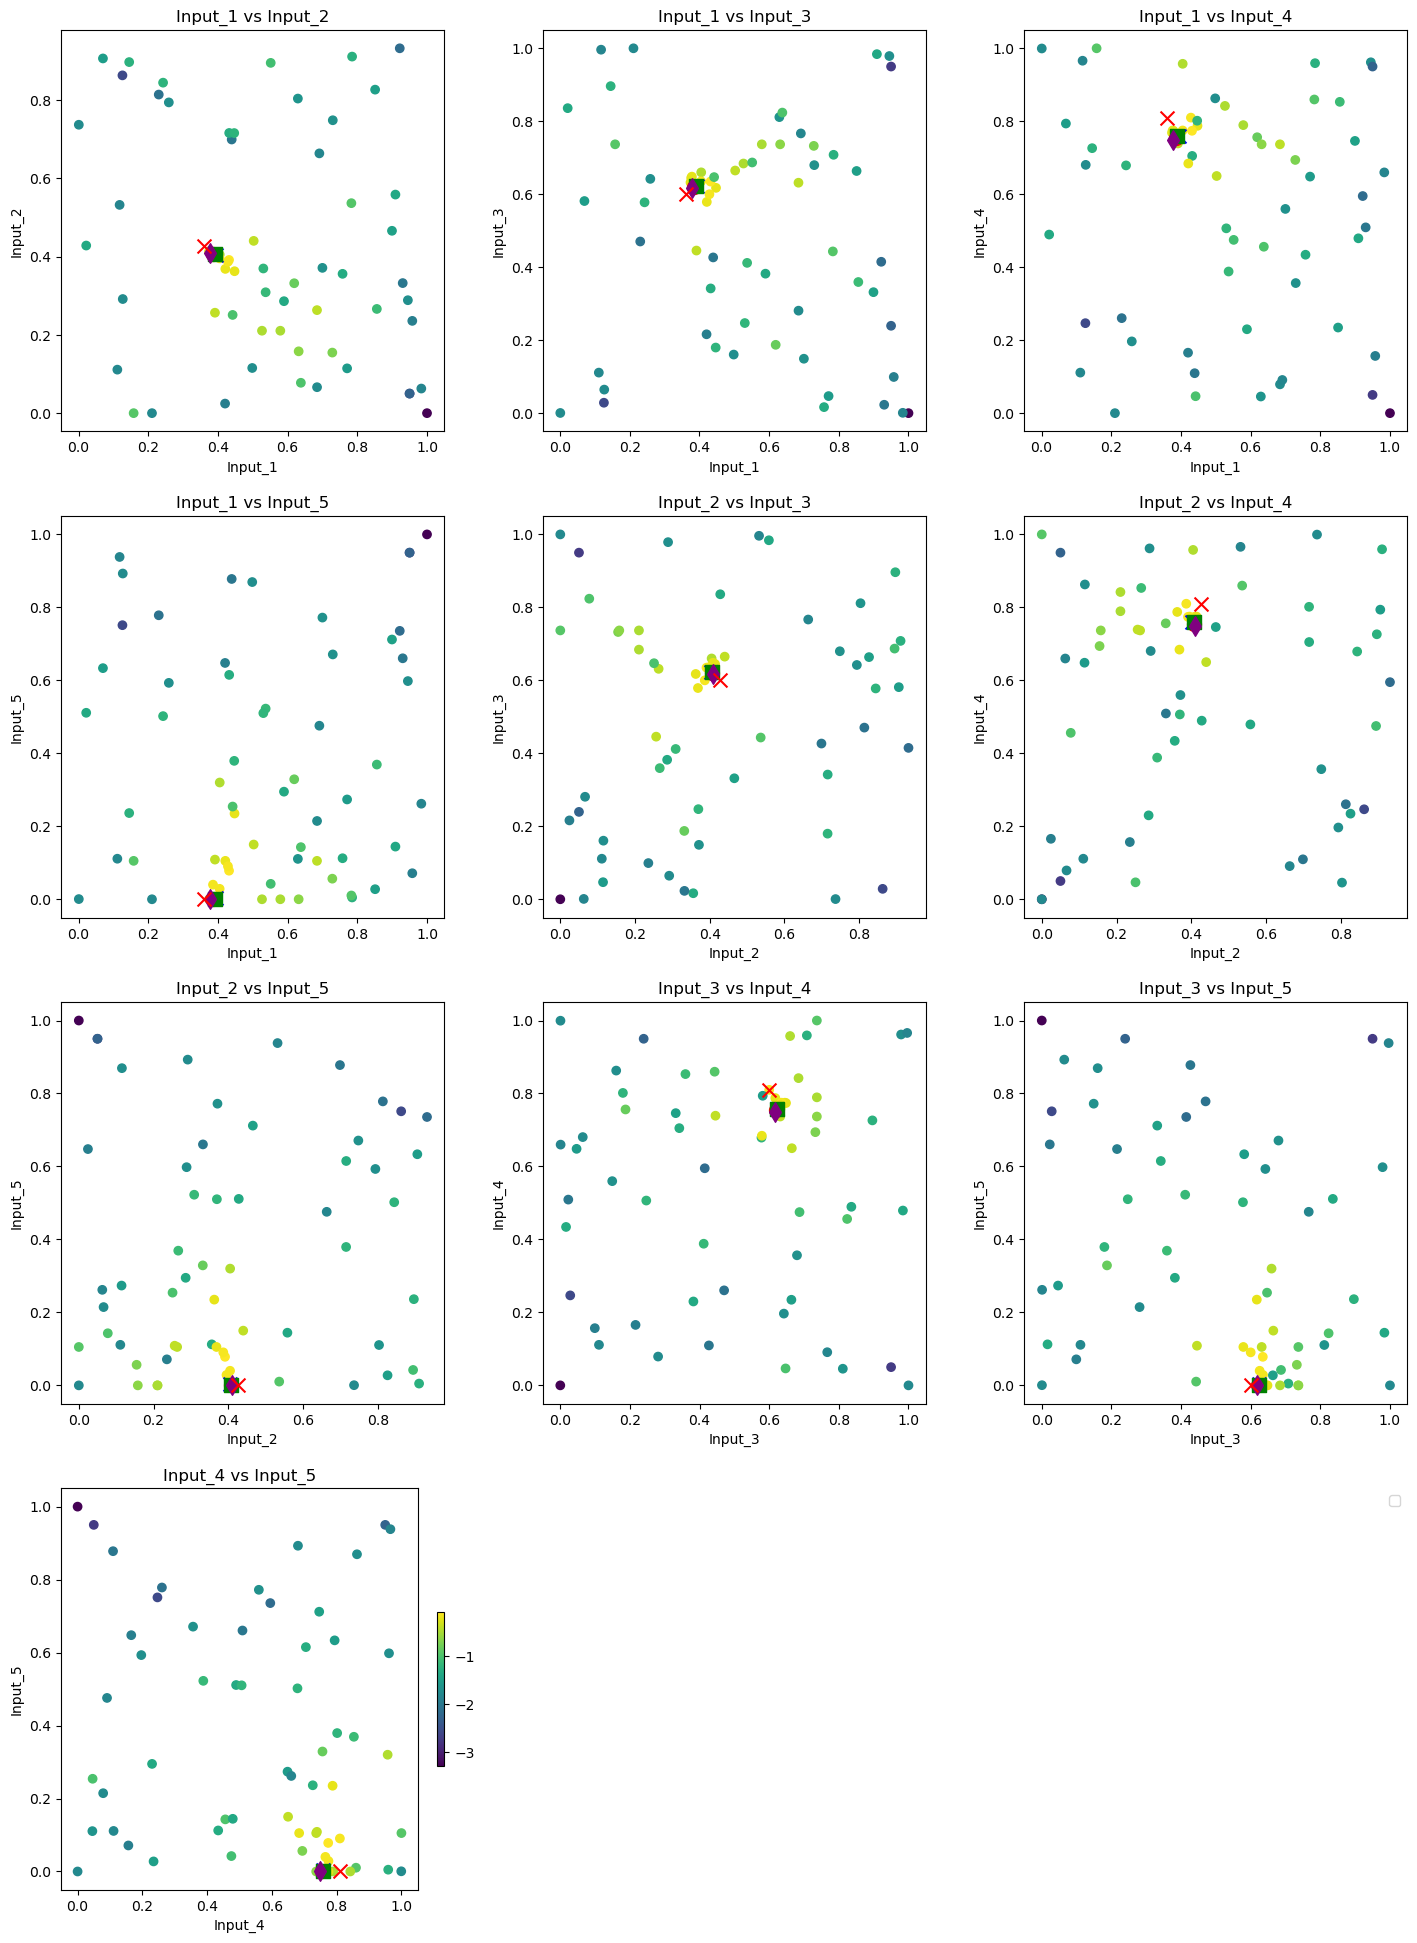

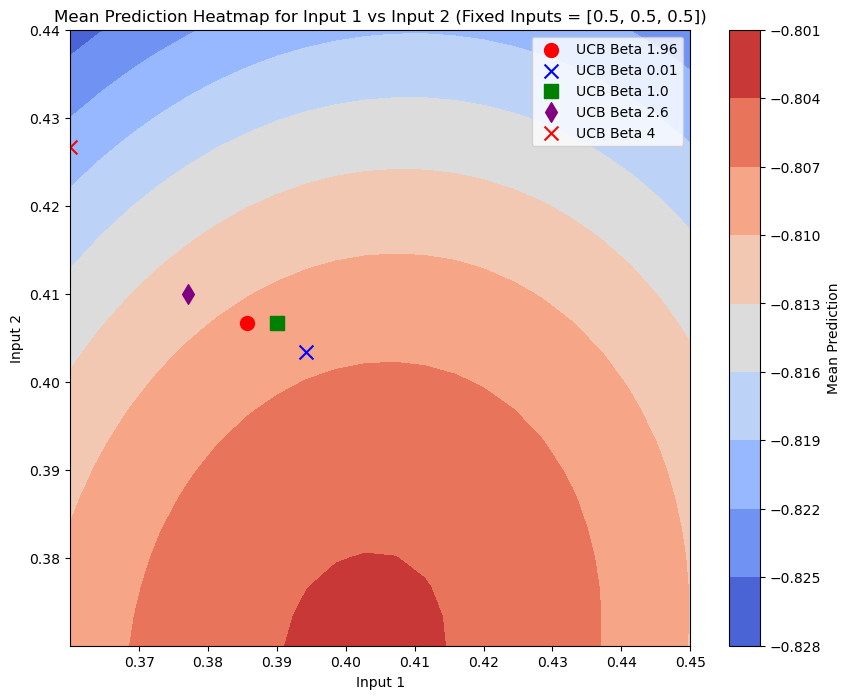

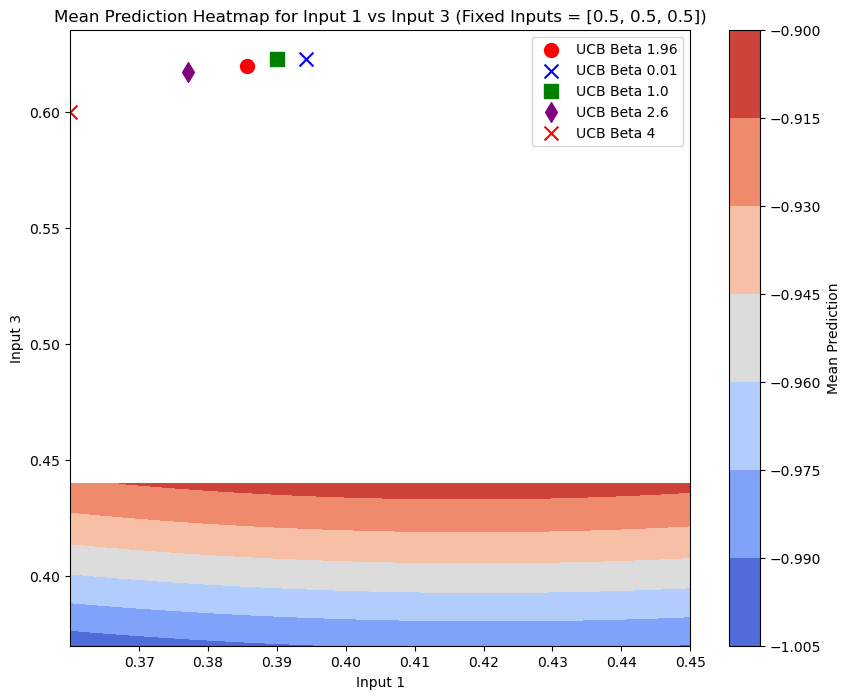

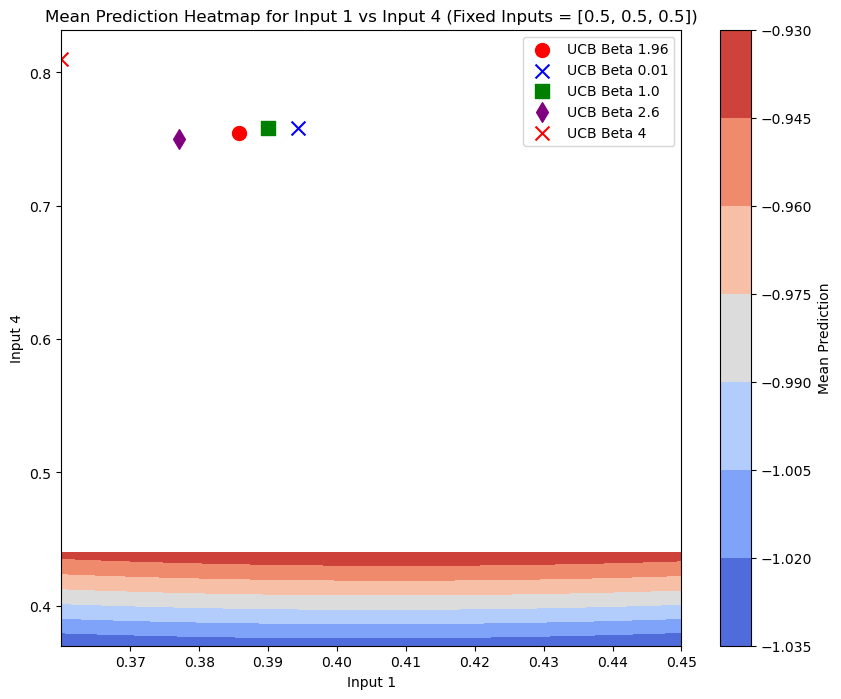

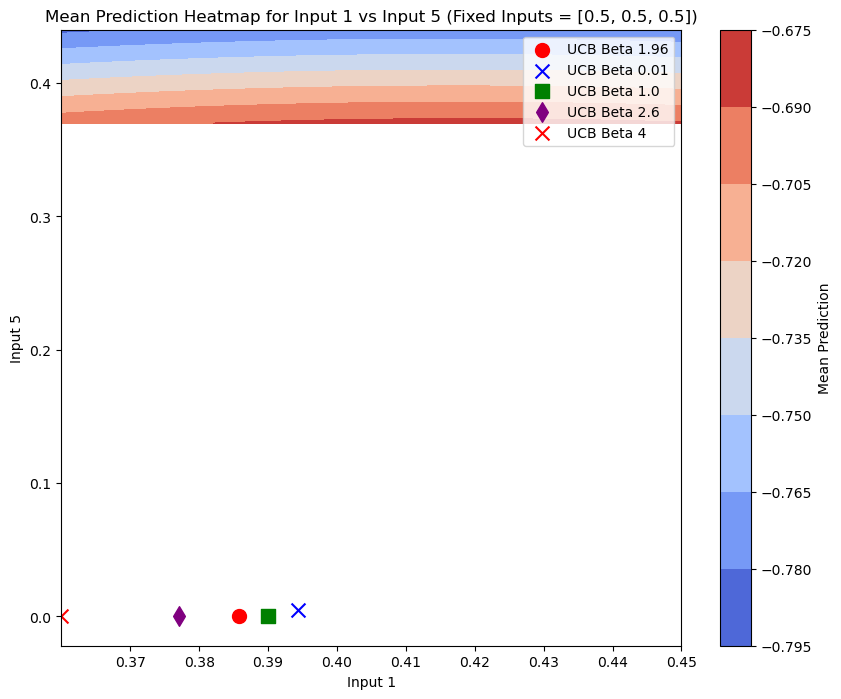

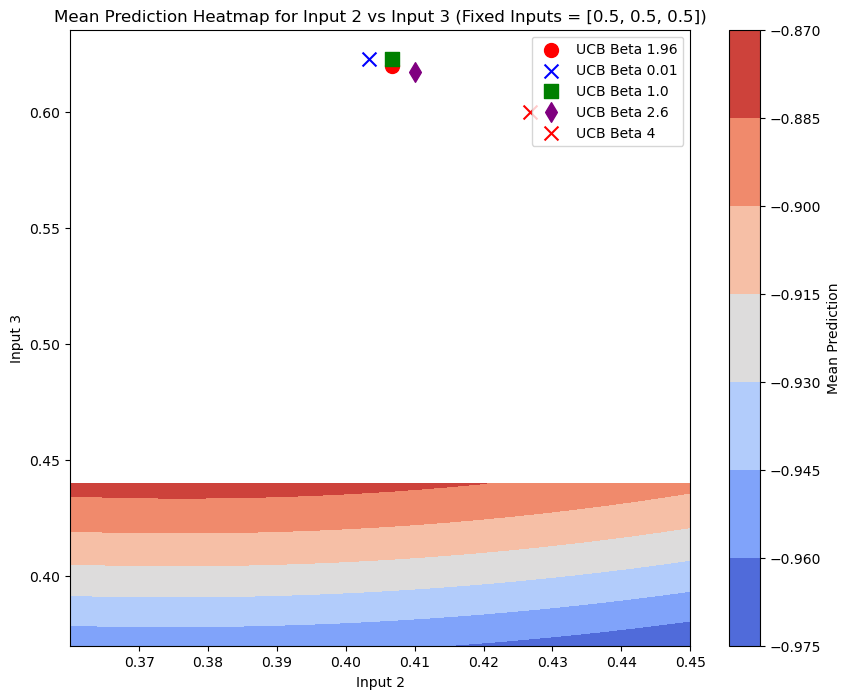

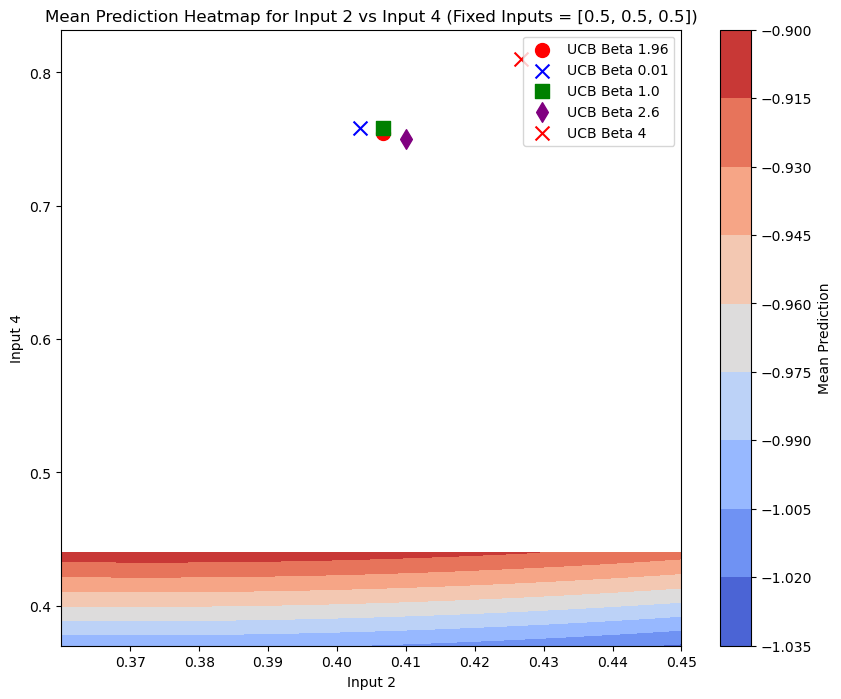

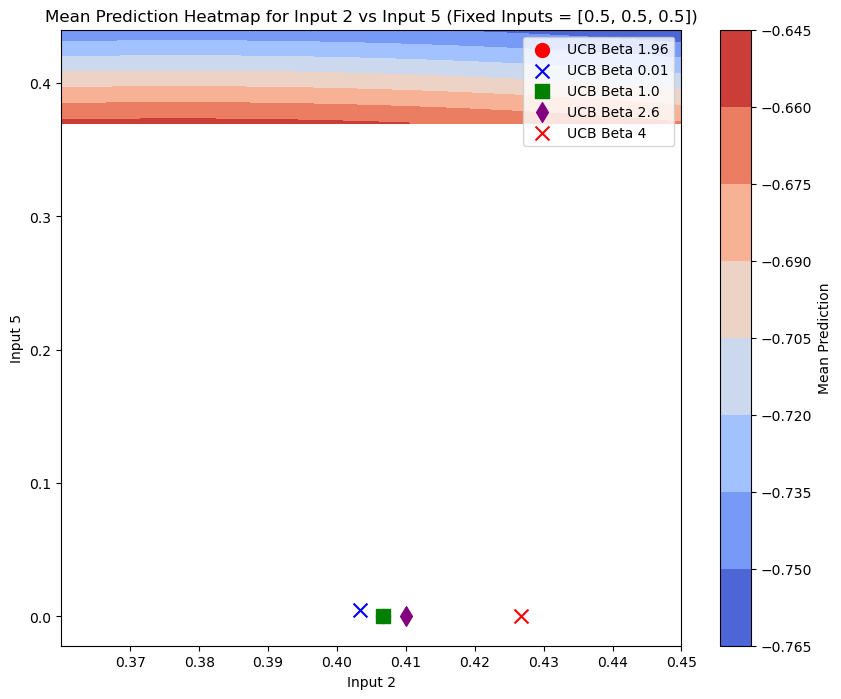

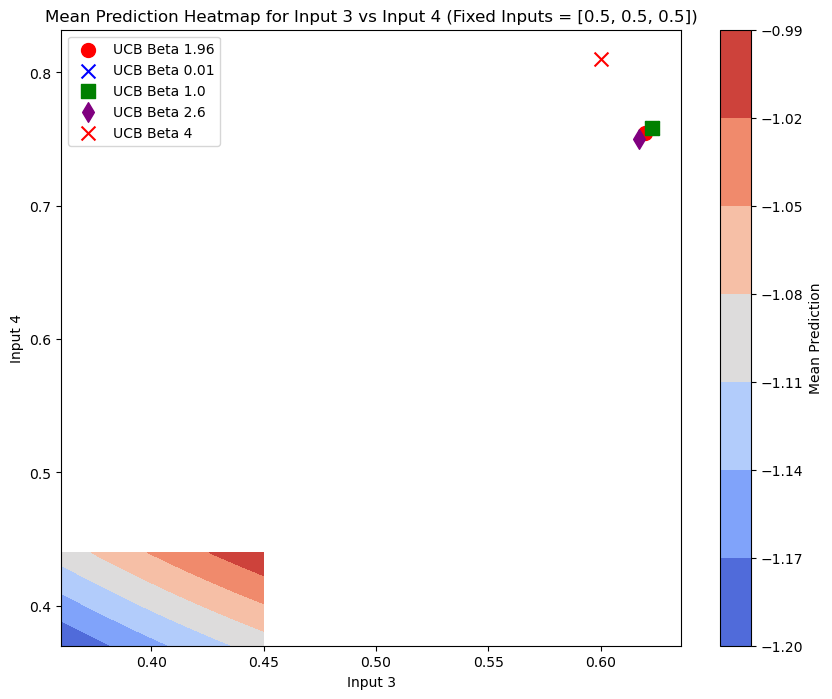

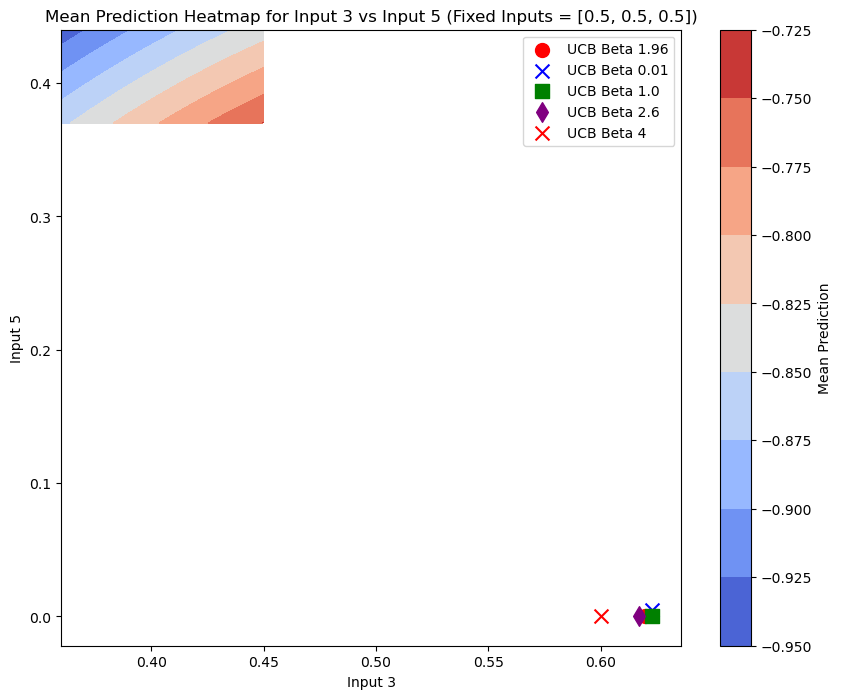

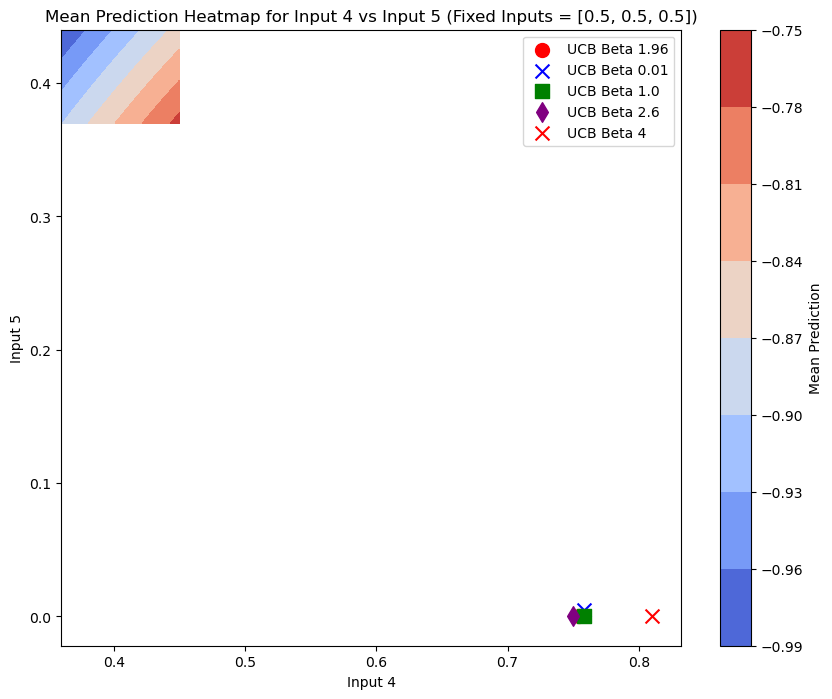

In [31]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)